In [ ]:
"""Based heavily on Software Carpentary tutorial:
https://github.com/story645/ccny_software_carpentary/blob/master/afternoon_session.ipynb
"""
import pandas as pd
#check which version of pandas is being used
pd.__version__

In [ ]:
"""load in Monthly Global Historical Climatology 
Network(GHCN) Data for New York City
"""
ghcn = pd.read_csv("nyc_2005_2015.csv")

In [ ]:
ghcn

In [ ]:
#view the first 5 rows of the data
ghcn.head()

In [ ]:
#view last 5
ghcn.tail()

In [ ]:
#can specifiy
ghcn.head(3)

In [ ]:
"""pandas uses numpy as its underlying structure
and so has numpy attributes like shape"""
ghcn.shape

In [ ]:
#get a columnwise summary of the data
ghcn.info()

In [ ]:
#just the datatype of each column
ghcn.dtypes

In [ ]:
#restrict to first entries of just one column
ghcn['STATION_NAME'].head(4)

In [ ]:
#can also use dot notation
ghcn.STATION_NAME.head(4)

Indexing
====

In [ ]:
#multiple columns?
ghcn['TSNW', 'MNTM']

In [ ]:
#Instead list of columns
ghcn[['TSNW','MNTM']].head()

In [ ]:
#order dictates display
ghcn[['MNTM','TSNW']].head()

In [ ]:
#supports numpy slicing
ghcn[['MNTM','TSNW']][5:15:2]

In [ ]:
#COPY IS EXPLICIT
ghcn2 = ghcn.copy()

In [ ]:
ghcn2['MNTM'][:3]=-9088

In [ ]:
ghcn['MNTM'][:3]

In [ ]:
ghcn2['MNTM'][:3]

In [118]:
#assignment isn't copy
ghcn3 = ghcn2
ghcn3['MNTM'][:3]="NOT A COPY"
print ghcn2['MNTM'][:3]

0    NOT A COPY
1    NOT A COPY
2    NOT A COPY
Name: MNTM, dtype: object


use whos to see which variables are currently in the workspace

must be in its own cell (not pandas specific)

In [ ]:
whos

In [ ]:
"""use index based selections->
under the hood it's more efficient
doesn't copy the data for the subset
is a view on the data"""
ghcn.loc[5:15:2, ['MNTM', 'TSWN']]

In [ ]:
#can also be used for columns
ghcn.loc[5:15:2,'TSNW':'MNTM']

In [ ]:
#view column names
ghcn.columns

In [ ]:
#pure numerical indexing (rows, cols)
ghcn.iloc[5:15:2, 4:7]

In [ ]:
# use np.r_ to build non sequential slice objects
import numpy as np
ghcn.iloc[np.r_[0,30:36:2,70],4:7]

Summary Statistics
==========

In [ ]:
#get counts of each max snowfall
ghcn['TSNW'].value_counts()

In [ ]:
#get more summary statistics
print ghcn['TSNW'].min()
print ghcn['TSNW'].mean()
print ghcn['TSNW'].max()

In [ ]:
#mask missing values (this is numpy functionality)
ghcn[ghcn==-9999]=np.nan

In [ ]:
print ghcn['TSNW'].min()
print ghcn['TSNW'].mean()
print ghcn['TSNW'].max()

In [ ]:
#get all the summary stats
ghcn['TSNW'].describe()

In [ ]:
#summary for entire dataset
ghcn.describe()

In [ ]:
#include string values 
ghcn.describe(include='all')

In [ ]:
#restrict by type
ghcn.describe(include=['object'])

Fixing dates
=======

In [ ]:
ghcn['DATE'].head()

In [ ]:
#use Python datetime strptime
from datetime import datetime 
"""the apply method applies the function 
that's passed inas an argument to every 
element in the column it's applied to
"""
def ds2dt(x):
    return datetime.strptime(str(x),'%Y%m%d')

parsed_date = ghcn['DATE'].apply(ds2dt)

In [ ]:
print parsed_date[:5]

In [ ]:
ghcn['DATE'] = parsed_date

In [ ]:
ghcn['DATE'].head()

In [ ]:
ghcn.describe()

In [ ]:
ghcn.describe(include=['datetime'])

Filtering
=====

In [ ]:
#boolean/conditional
ghcn[ghcn['TSNW']>400]

In [ ]:
#compound boolean
ghcn[(ghcn['TSNW']>400) & (ghcn['MNTM']<0)]

In [ ]:
#string based boolean mask
ghcn['STATION_NAME'].str.match('CENTERPORT NY US') # boolean mask

In [ ]:
#pull out data using mask
mask = ghcn['STATION_NAME'].str.match('CENTERPORT NY US')
ghcn[mask]

In [ ]:
#list of stations
ghcn['STATION_NAME'].unique()

In [ ]:
#any station in list
stations = ['MIDDLE VILLAGE 0.5 SW NY US',
            'STATEN ISLAND 4.5 SSE NY US' ]
ghcn[ghcn['STATION_NAME'].isin(stations)]

In [ ]:
#anything near an airport
ghcn[ghcn['STATION_NAME'].str.contains("AIRPORT")]

Sorting
====

In [ ]:
ghcn['TSNW'].order()

In [ ]:
#sort by columns
ghcn.sort_index(by=['TSNW', 'EMXP']).head()

Grouping
=====

In [ ]:
#order the data by Station
by_station = ghcn.groupby("STATION_NAME")

In [ ]:
by_station

In [ ]:
by_station.count() #how many of each record

In [ ]:
by_station.size()

In [ ]:
#how much total snow in each station?
by_station['TSNW'].sum()

In [ ]:
#average temperature
by_station['MNTM'].mean()

In [ ]:
#can also do summary
by_station['TSNW'].describe()

In [ ]:
#and make it more readable using unstack
by_station['TSNW'].describe().unstack()

In [ ]:
#can subclass groups
groups = ['DATE', 'STATION_NAME']
ghcn.groupby(groups)['TSNW'].sum().unstack()

In [ ]:
"""aggregate by month:
.map(lambda x)pulls out the months 
of the date column"""
months = ghcn['DATE'].map(lambda x: x.month)
ghcn.groupby(months).mean()

In [ ]:
#combine date and station
new_groups = ['STATION_NAME', months]
ghcn.groupby(new_groups)['TSNW'].sum().unstack()

In [ ]:
snow = ghcn.groupby(new_groups)['TSNW'].sum().unstack()
print snow.shape

In [ ]:
#flip for graphing 
snow_graph = snow.T
print snow_graph.shape

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import calendar
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(2,1,1)

im = ax.matshow(snow_graph, cmap='Blues')

station_names = ghcn['STATION_NAME'].unique()
ax.set_xticks(range(len(station_names)))
ax.set_xticklabels(station_names, rotation=90)
ax.set_yticks(np.arange(0,12))
ax.set_yticklabels(calendar.month_name[1:])
cb = fig.colorbar(im, ax=ax,pad=.01, fraction=.020)
cb.set_label("Total Snowfall")

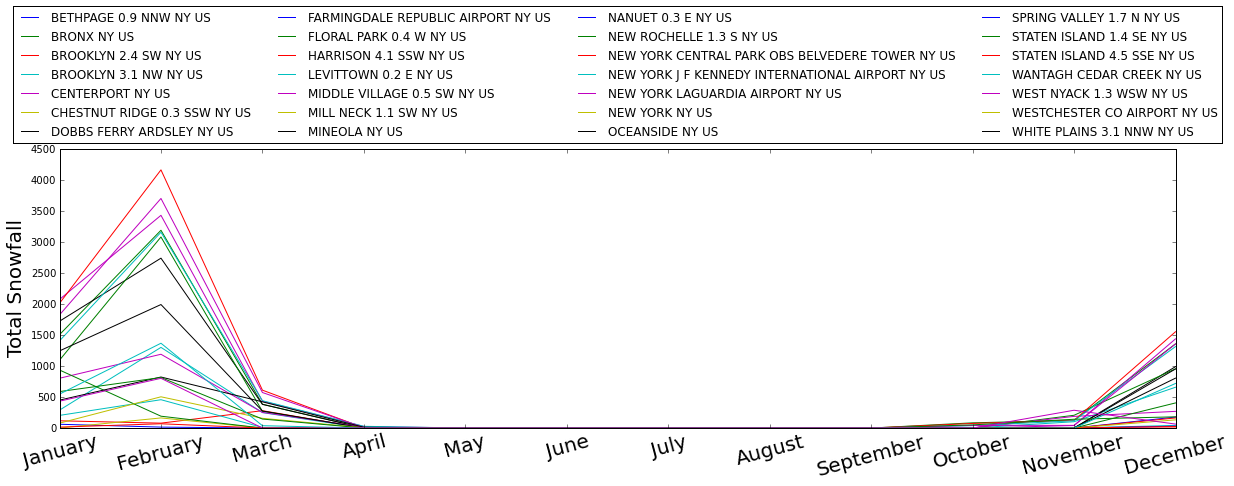

In [122]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

for s in snow_graph:
    ax.plot(snow_graph[s].index,
            snow_graph[s].values, '-',label=s)
    
ax.legend(bbox_to_anchor=(0.5, 1.), 
          loc=8, ncol=4)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(calendar.month_name[1:], 
                   rotation=15, fontsize=20)
ax.set_xlim((1,12))
ax.set_ylabel("Total Snowfall", fontsize=20)

Pivot Table
======

In [ ]:
#create a pivot table to do advanced grouping
ghcn_p = ghcn.pivot_table(index=months, 
            columns='STATION_NAME', 
            aggfunc={'TSNW':'sum', 'MNTM':'mean'})

In [ ]:
#doesn't like months, so let's add a column
ghcn['MONTH'] = ghcn['DATE'].map(lambda x: x.month)
ghcn[['DATE', 'MONTH']].head()


In [ ]:
"""index becomes the row agg function is how 
data in each subset->(Station, Date) is analyzed:
* first argument is the column being analyzed
* second is aggregating function:
    * total snow
    * average tmp
"""
#now fancy grouping
ghcn_pivot = ghcn.pivot_table(index='MONTH', 
            columns='STATION_NAME', 
            aggfunc={'TSNW':'sum', 'MNTM':'mean'})

In [ ]:
ghcn_pivot

Plot table
======

In [ ]:
ghcn_pivot['TSNW'].plot()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ghcn_pivot['TSNW'].plot(ax=ax)

ax.legend(bbox_to_anchor=(0.5, 1.), 
          loc=8, ncol=4)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(calendar.month_name[1:], 
                   rotation=15, fontsize=20)
ax.set_xlim((1,12))
ax.set_ylabel("Total Snowfall", fontsize=20)

In [ ]:
snow.values

Correlation


In [ ]:
ghcn.corr()

In [119]:
#exclude month
ghcn_corr = ghcn.loc[:,'EMXP':'MMNT'].corr()
ghcn_corr

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT
EMXP,1.000000,0.045299,0.818845,0.065864,0.112226,0.102773,0.094833,0.101745
MXSD,0.045299,1.000000,0.078553,0.876812,-0.518933,-0.496463,-0.528504,-0.519803
TPCP,0.818845,0.078553,1.000000,0.110570,0.079403,0.102248,0.077226,0.101086
TSNW,0.065864,0.876812,0.110570,1.000000,-0.549729,-0.476868,-0.519350,-0.497323
EMXT,0.112226,-0.518933,0.079403,-0.549729,1.000000,0.871276,0.943890,0.910294
EMNT,0.102773,-0.496463,0.102248,-0.476868,0.871276,1.000000,0.956555,0.975396
MMXT,0.094833,-0.528504,0.077226,-0.519350,0.943890,0.956555,1.000000,0.985793
MMNT,0.101745,-0.519803,0.101086,-0.497323,0.910294,0.975396,0.985793,1.000000


<matplotlib.colorbar.Colorbar instance at 0x0000000012FD0C88>

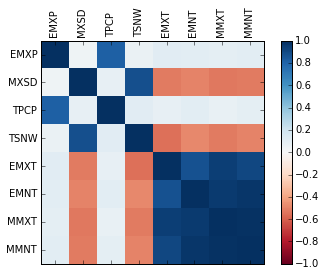

In [120]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

im = ax.matshow(ghcn_corr,
                cmap='RdBu', vmin=-1, vmax=1)
ax.set_xticks(range(ghcn_corr.shape[0]))
ax.set_yticks(range(ghcn_corr.shape[1]))
ax.set_xticklabels(ghcn_corr.columns,rotation=90)
ax.set_yticklabels(ghcn_corr.columns)

fig.colorbar(im, ax=ax)

<matplotlib.colorbar.Colorbar instance at 0x00000000143CDC48>

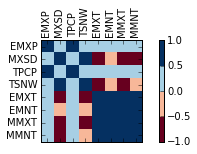

In [127]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

import matplotlib.colors as mcolors
import matplotlib.cm as mcm

cmap = mcm.RdBu
norm = mcolors.BoundaryNorm([-1,-.5,0, .5, 1], cmap.N)

im = ax.matshow(ghcn_corr,
                cmap=cmap, norm=norm)
ax.set_xticks(range(ghcn_corr.shape[0]))
ax.set_yticks(range(ghcn_corr.shape[1]))
ax.set_xticklabels(ghcn_corr.columns,rotation=90)
ax.set_yticklabels(ghcn_corr.columns)
ax2 = fig.add_subplot(2,1,1)

fig.colorbar(im, ax=ax2)